## In-class practice for Lecture 15

* Statistics basics: Covariance, Correlation and Curve Fitting
* New Python tricks: curve fitting for statistical data sets
* Answer each question using Python codes in a separate cell

### Logistic Fitting for SARS 2003 data

The 2002–2004 outbreak of SARS, caused by severe acute respiratory syndrome coronavirus (SARS-CoV or SARS-CoV-1), infected over 8,000 people from 29 countries and territories, and resulted in at least 774 deaths worldwide.[from wiki]

The outbreak was first identified in Foshan, Guangdong, China, in November 2002 The World Health Organization (WHO) was notified of the outbreak in February 2003, and issued a global alert in March 2003. Initially, the cause of the outbreak was unknown, and some media outlets reported that an influenza virus was a potential culprit. The major part of the outbreak lasted about 8 months, and the World Health Organization declared SARS contained on 5 July 2003. 

Let's use a "logistic" curve to fit the SARS 2003 data of China mainland (you can try Hong Kong as well), based on the curve fitting technique you have learned from today's lecture. 

- download the data file 'sars_2003_complete_dataset_clean.csv'
- load the data file into a pandas dataframe, take a look at the dataframe
- you may want to change the column names for easy referencing
- select the data for the country "China"
- plot the total cases (accumulated cases) as a function of time

Now the first colume is "Date", which is just a string that cannot be used for direct processing. Let's use the datetime functions in pandas to practice how to process datasets with time:

- first create a new column, e.g., sars_hk['Date'] = pd.to_datetime(sars_hk['Date']), to convert the 'Date' colume to a "datetime" object. 
- try use the .dtypes to see what data types are in the dataframe, the new column should be a "datetime" type
- now lets create a new column that indicates the number of days since the first outbreak on 2003-3-18. There are multiple ways to do it, here I use the following steps: 
    1. import that datetime module, using "from datetime import datetime"
    2. define the date object for day zero: "day0 = datetime.strptime('2003-03-18', '%Y-%m-%d')"
    3. calculate the difference between the first column and day0: "sars['Days'] = (sars['Date'] - day0)/np.timedelta64(1,'D')", here sars is is the name of the dataframe with China filtered
    4. after doing so, take a look at the dataframe and you'll find a new column named "Days" which is the epoch time of the SARS outbreak, i.e., '2003-03-18' is day = 0
    
- Plot the total cases as a function of days
- Use the logistic function to fit the SARS 2003 data:
$$f(t) = \frac{L}{1+e^{-k(t-t_0)}}$$
Here $L$ is the maximum value of SARS cases; $k$ is the growth rate and $x_0$ is the time value of the mid point. more details can be found in many online resources such as https://andymath.com/logistic-function/
- based on the growth rate of k, the R0 value is estimated as 1/(2k). What is the R0 value you found?

The logistic function does not look great for the starting data points, so let's try a shifted version of the logistic curve:  
$$f(t) = C+\frac{L}{1+e^{-k(t-t_0)}}$$
Try the curve_fit function to find the optimal values for the new logistic function

         Date               Country  Cumulative number of case(s)  \
0  2003-03-17               Germany                             1   
1  2003-03-17                Canada                             8   
2  2003-03-17             Singapore                            20   
3  2003-03-17  Hong Kong SAR, China                            95   
4  2003-03-17           Switzerland                             2   

   Number of deaths  Number recovered  
0                 0                 0  
1                 2                 0  
2                 0                 0  
3                 1                 0  
4                 0                 0  


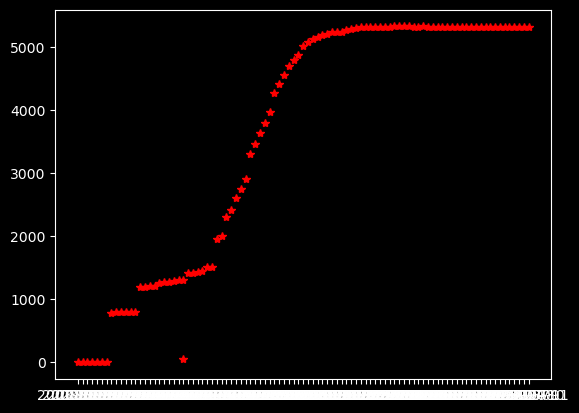

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


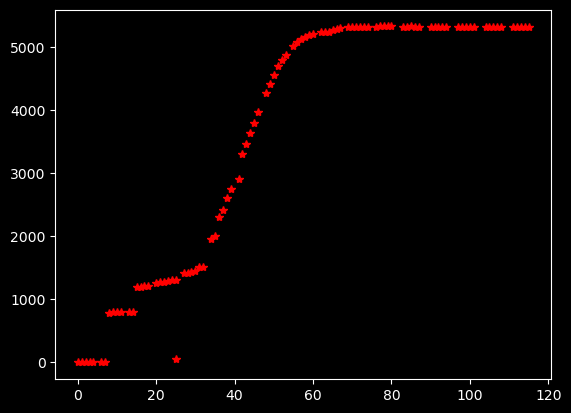

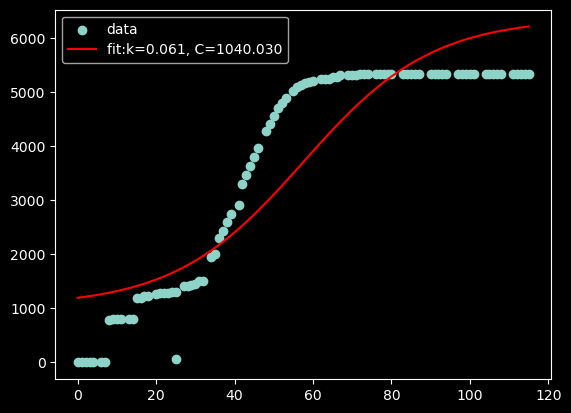

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy.optimize import curve_fit

sars = pd.read_csv("./data/sars_2003_complete_dataset_clean.csv")
print(sars.head())
sars.rename(columns={"Cumulative number of case(s)":"cases","Number of deaths":"deaths",\
    "Number recovered":"recovered"},inplace=True)
sars_China = sars[sars["Country"]=="China"]

plt.plot(sars_China["Date"],sars_China["cases"],"r*")
plt.show()

sars_China['Date'] = pd.to_datetime(sars_China["Date"])
print(type(sars_China.iat[0,0]))

day0 = datetime.strptime("2003-03-18",'%Y-%m-%d')
sars_China['Days'] = (sars_China['Date'] - day0)/np.timedelta64(1,'D')
plt.plot(sars_China["Days"],sars_China["cases"],"r*")
plt.show()

L = max(sars_China["cases"])
t0 = max(sars_China["Days"])/2

def logistic(t, k, C): # parameters: k, C  
    return L/(1+np.exp(-k*(t-t0)))+C

xdata = sars_China["Days"]
ydata = sars_China["cases"]
popt, pcov = curve_fit(logistic, xdata, ydata)

plt.scatter(xdata, ydata, label="data")
plt.plot(xdata, logistic(xdata, *popt),'r-',label="fit:k=%5.3f, C=%5.3f"%tuple(popt))
plt.legend()
plt.show()








### [Optional] Polynomial fits for radioative decay

Certain isotopes are unstable and decay through _radioactive decay_.  The formula for radioactive decay is:

$N= N_o \exp^{-\lambda T}$

  $\lambda$ is the decay constant (the time for $N$ to decay to $\exp(-1)$ of the original value

  $T$ is time

  $N$ is the number of nuclei remaining after time $T$ 

  $N_o$ is the original number or parent nuclei

The _half-life_ ($t_{1/2}$) is the time for $N$ to decay to $N_o$/2. The formula is:

$t_{1/2} = \frac {ln 2}{\lambda}$

- Write a lambda function to calculate radioactive decay. The decay constant, time, and initial parent should be supplied as parameters.  
- The half-life of radiocarbon is 5,730 yrs. Calculate the decay constant of radiocarbon 
- Assume that the the initial parent, $N_o$, is 1, and time ranges from 0 to 7 half-lives. Use your function to calculate radioactive decay for radiocarbon
- Plot a curve of $N$ versus $T$  
- Use the curve_fit function, calculate a n-th degree polynomial fit to your radioactive decay curve. Which n gives the best answer?  